<a href="https://colab.research.google.com/github/jarekwan/jarwan_projekt/blob/main/PR_KONC_BOOTCAMP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Przygotowanie środowiska i danych
# Najpierw ustalasz, z jakich źródeł danych korzystasz — z pliku z Kaggle (Supplier Performance Dataset) oraz z danych syntetycznych wygenerowanych samodzielnie w Pythonie.
# Sprawdzasz, czy dane mają spójne kolumny (np. czas dostawy, niezawodność, koszt, liczba reklamacji).
# Dane z obu źródeł można analizować osobno albo połączyć w jedną tabelę.





In [1]:
import pandas as pd
import numpy as np
from google.colab import files
import io

#  WYBÓR ŹRÓDŁA DANYCH
print("Wybierz źródło danych:")
print("1 - Wczytaj plik CSV z komputera")
print("2 - Użyj danych syntetycznych")

choice = input("Podaj 1 lub 2: ")

if choice == "1":
    # --- Wczytanie danych z pliku ---
    print("📂 Wybierz plik CSV...")
    up = files.upload()
    if not up:
        raise ValueError("Nie wybrano pliku.")
    df = pd.read_csv(io.BytesIO(next(iter(up.values()))))
    print("\n✅ Dane z CSV wczytane. Wymiary:", df.shape)
    print(df.head())

    # --- Wybór kolumny ID dostawcy ---
    print("\nKolumny w pliku:")
    for i, c in enumerate(df.columns):
        print(f"{i}: {c}")
    id_idx = int(input("\nPodaj numer kolumny będącej supplier_id: "))
    supplier_col = df.columns[id_idx]

    # --- Nadpisanie nazwy kolumny na supplier_id ---
    df = df.rename(columns={supplier_col: "supplier_id"})
    df["supplier_id"] = df["supplier_id"].astype(str)

    # --- Cechy numeryczne do analizy (bez ID) ---
    num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

elif choice == "2":
    # --- Dane syntetyczne ---
    n = 2000
    df = pd.DataFrame({
        'supplier_id': [f'S{i}' for i in range(1, n+1)],
        'delivery_time': np.random.normal(5, 1.5, n),
        'reliability': np.random.uniform(0.7, 1.0, n),
        'cost': np.random.normal(100, 15, n),
        'complaints': np.random.randint(0, 5, n)
    })
    print("\n✅ Użyto danych syntetycznych. Wymiary:", df.shape)
    print(df.head())

    # --- Cechy numeryczne w syntetyku ---
    num_cols = ['delivery_time', 'reliability', 'cost', 'complaints']

else:
    raise ValueError("❌ Nieprawidłowy wybór! Uruchom ponownie i podaj 1 lub 2.")

print("\nℹ️ Kontynuuję analizę na wybranych danych...")


Wybierz źródło danych:
1 - Wczytaj plik CSV z komputera
2 - Użyj danych syntetycznych
Podaj 1 lub 2: 1
📂 Wybierz plik CSV...


Saving FF.csv to FF.csv

✅ Dane z CSV wczytane. Wymiary: (777, 11)
      PO_ID         Supplier  Order_Date Delivery_Date    Item_Category  \
0  PO-00001        Alpha_Inc  2023-10-17    2023-10-25  Office Supplies   
1  PO-00002  Delta_Logistics  2022-04-25    2022-05-05  Office Supplies   
2  PO-00003         Gamma_Co  2022-01-26    2022-02-15              MRO   
3  PO-00004    Beta_Supplies  2022-10-09    2022-10-28        Packaging   
4  PO-00005  Delta_Logistics  2022-09-08    2022-09-20    Raw Materials   

  Order_Status  Quantity  Unit_Price  Negotiated_Price  Defective_Units  \
0    Cancelled      1176       20.13             17.81              NaN   
1    Delivered      1509       39.32             37.34            235.0   
2    Delivered       910       95.51             92.26             41.0   
3    Delivered      1344       99.85             95.52            112.0   
4    Delivered      1180       64.07             60.53            171.0   

  Compliance  
0        Yes  
1

2️⃣ Wstępna analiza danych (EDA)

Na tym etapie poznajesz dane:
• sprawdzasz, jakie są typy kolumn i czy są braki,
• liczysz podstawowe statystyki (średnie, odchylenia),
• szukasz wartości odstających,
• oglądasz rozkłady i zależności między zmiennymi,
• analizujesz korelacje, żeby zobaczyć, które cechy są do siebie podobne lub powielają tę samą informację.
Celem EDA jest zrozumienie struktury danych i pierwsze przeczucie, jakie grupy mogą się w nich kryć.

In [ ]:


# 2️⃣ Wstępna analiza danych (EDA)

# Na tym etapie poznajesz dane:
#  • sprawdzasz, jakie są typy kolumn i czy są braki,
#  • liczysz podstawowe statystyki (średnie, odchylenia),
#  • szukasz wartości odstających, • oglądasz rozkłady i zależności między zmiennymi,
#  • analizujesz korelacje, żeby zobaczyć, które cechy są do siebie podobne lub powielają tę samą informację. Celem EDA jest zrozumienie struktury danych i pierwsze przeczucie, jakie grupy mogą się w nich kryć.


Podgląd danych:


,PO_ID,supplier_id,Order_Date,Delivery_Date,Item_Category,Order_Status,Quantity,Unit_Price,Negotiated_Price,Defective_Units,Compliance
0,PO-00001,Alpha_Inc,2023-10-17,2023-10-25,Office Supplies,Cancelled,1176,20.13,17.81,NaN,Yes
1,PO-00002,Delta_Logistics,2022-04-25,2022-05-05,Office Supplies,Delivered,1509,39.32,37.34,235.0,Yes
2,PO-00003,Gamma_Co,2022-01-26,2022-02-15,MRO,Delivered,910,95.51,92.26,41.0,Yes
3,PO-00004,Beta_Supplies,2022-10-09,2022-10-28,Packaging,Delivered,1344,99.85,95.52,112.0,Yes
4,PO-00005,Delta_Logistics,2022-09-08,2022-09-20,Raw Materials,Delivered,1180,64.07,60.53,171.0,No



Typy danych:
PO_ID                object
supplier_id          object
Order_Date           object
Delivery_Date        object
Item_Category        object
Order_Status         object
Quantity              int64
Unit_Price          float64
Negotiated_Price    float64
Defective_Units     float64
Compliance           object
dtype: object

Liczba brakujących wartości w kolumnach:
PO_ID                 0
supplier_id           0
Order_Date            0
Delivery_Date        87
Item_Category         0
Order_Status          0
Quantity              0
Unit_Price            0
Negotiated_Price      0
Defective_Units     136
Compliance            0
dtype: int64

Podstawowe statystyki:


,Quantity,Unit_Price,Negotiated_Price,Defective_Units
count,777.000000,777.000000,777.000000,641.000000
mean,1094.660232,58.283822,53.660721,74.803432
std,647.844551,28.101315,26.094930,69.187870
min,51.000000,10.840000,9.270000,0.000000
25%,615.000000,33.290000,30.460000,26.000000
50%,1075.000000,58.950000,53.800000,49.000000
75%,1548.000000,83.130000,76.550000,100.000000
max,5000.000000,109.170000,107.390000,321.000000


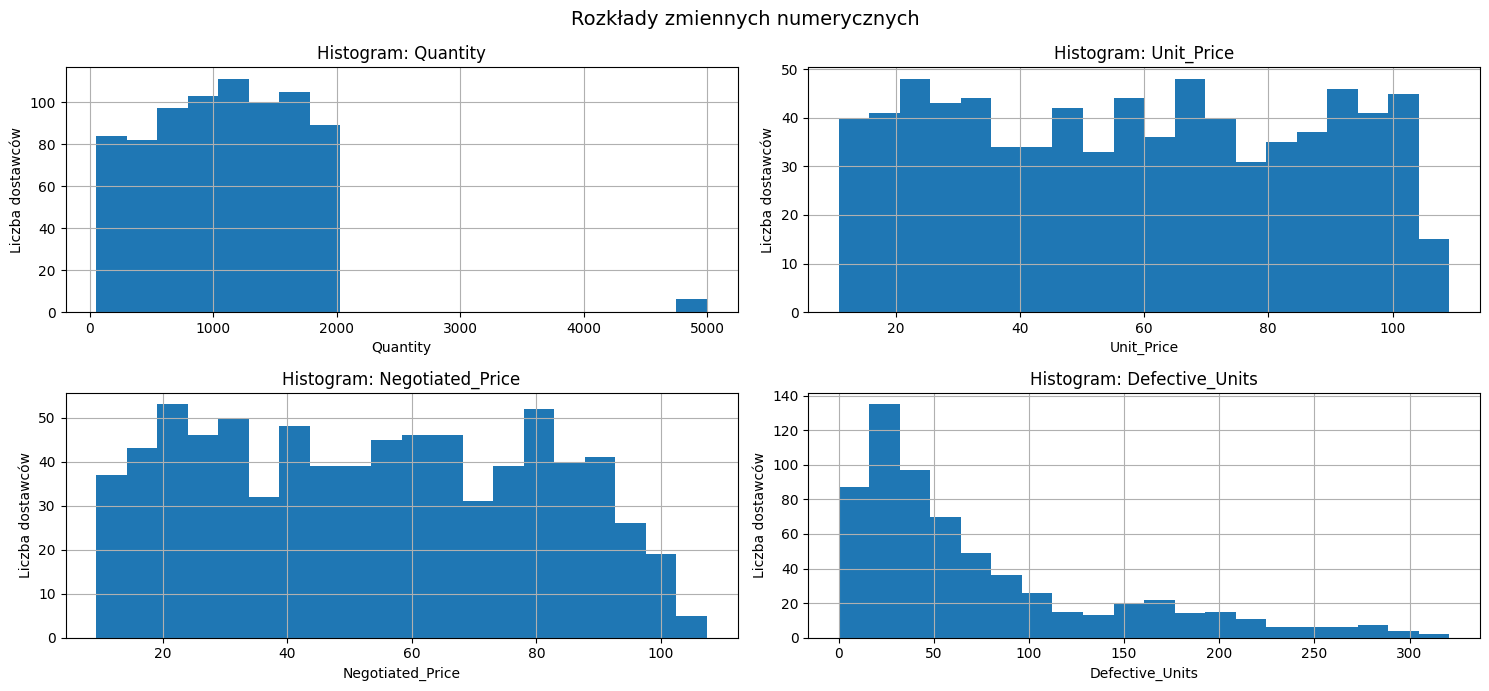

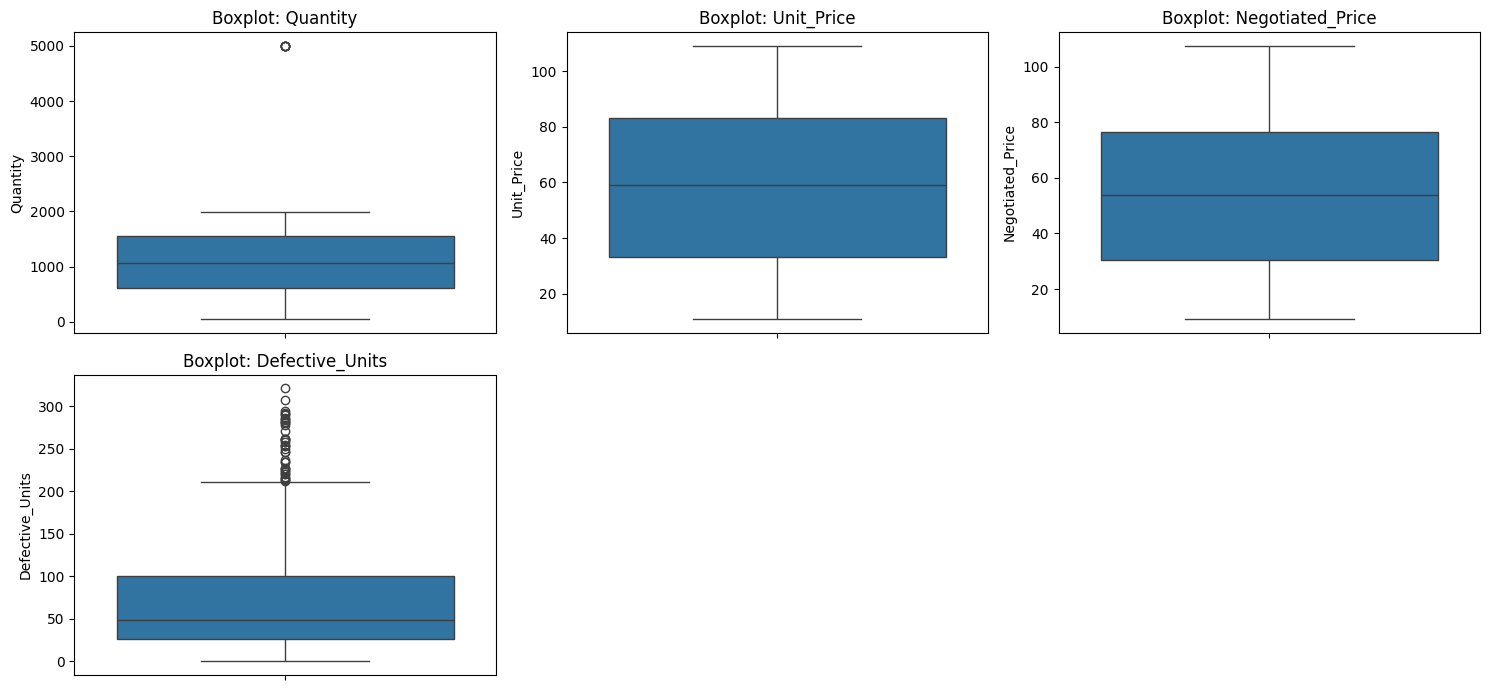


⚠️ Outliery w kolumnie 'Quantity': 6 obserwacji


,supplier_id,Quantity
10,Epsilon_Group,5000
11,Beta_Supplies,5000
12,Beta_Supplies,5000
13,Beta_Supplies,5000
14,Delta_Logistics,5000
15,Beta_Supplies,5000



⚠️ Outliery w kolumnie 'Unit_Price': 0 obserwacji


,supplier_id,Unit_Price



⚠️ Outliery w kolumnie 'Negotiated_Price': 0 obserwacji


,supplier_id,Negotiated_Price



⚠️ Outliery w kolumnie 'Defective_Units': 40 obserwacji


,supplier_id,Defective_Units
1,Delta_Logistics,235.0
53,Delta_Logistics,262.0
85,Delta_Logistics,262.0
86,Delta_Logistics,278.0
87,Delta_Logistics,228.0
132,Delta_Logistics,282.0
148,Beta_Supplies,216.0
170,Delta_Logistics,235.0
199,Delta_Logistics,291.0
225,Delta_Logistics,250.0


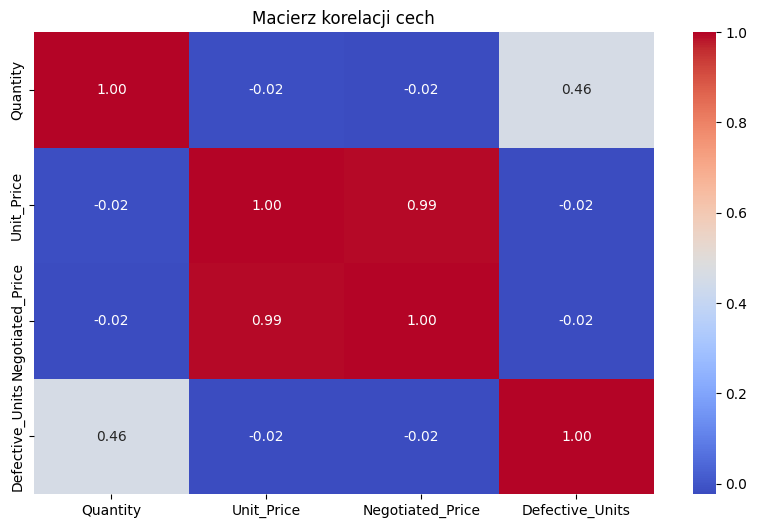


Najsilniejsze korelacje między zmiennymi:
Unit_Price        Negotiated_Price    0.994602
Negotiated_Price  Unit_Price          0.994602
Defective_Units   Quantity            0.459988
Quantity          Defective_Units     0.459988
Defective_Units   Negotiated_Price    0.023030
dtype: float64


In [2]:
# 2️⃣ Wstępna analiza danych (EDA) – pełny blok, elastyczny dla dowolnej liczby kolumn numerycznych

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Podgląd danych
print("Podgląd danych:")
display(df.head())

# Typy danych i braki
print("\nTypy danych:")
print(df.dtypes)
print("\nLiczba brakujących wartości w kolumnach:")
print(df.isnull().sum())

# Statystyki opisowe
print("\nPodstawowe statystyki:")
display(df.describe())

# --- Kolumny numeryczne (bez supplier_id jeśli jest numeryczne) ---
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if "supplier_id" in num_cols:
    num_cols.remove("supplier_id")

k = len(num_cols)
if k == 0:
    print("\n[INFO] Brak kolumn numerycznych — pomijam histogramy/boxploty/korelacje.")
else:
    # --- HISTOGRAMY (siatka dopasowana do k) ---
    cols = 3 if k >= 3 else (2 if k == 2 else 1)
    rows = int(np.ceil(k / cols))
    axes = df[num_cols].hist(figsize=(5*cols, 3.5*rows), bins=20)

    # Ujednolicenie struktury axes
    if not isinstance(axes, np.ndarray):
        axes = np.array([axes])
    axes = axes.flatten()

    for ax, col in zip(axes, num_cols):
        ax.set_xlabel(col)
        ax.set_ylabel("Liczba dostawców")
        ax.set_title(f"Histogram: {col}")

    plt.suptitle("Rozkłady zmiennych numerycznych", fontsize=14)
    plt.tight_layout()
    plt.show()

    # --- BOXPLOTY (siatka dopasowana do k) ---
    plt.figure(figsize=(5*cols, 3.5*rows))
    for i, col in enumerate(num_cols, 1):
        ax = plt.subplot(rows, cols, i)
        sns.boxplot(y=df[col], ax=ax)
        ax.set_title(f"Boxplot: {col}")
        ax.set_ylabel(col)
    plt.tight_layout()
    plt.show()

    # --- Outliery (IQR) + lista rekordów z ID ---
    def find_outliers(col):
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        mask = (df[col] < lower) | (df[col] > upper)
        # jeśli brak kolumny supplier_id w df (np. CSV bez wybranego ID), pokazuj tylko kolumnę
        cols_to_show = ['supplier_id', col] if 'supplier_id' in df.columns else [col]
        return df.loc[mask, cols_to_show]

    for c in num_cols:
        out = find_outliers(c)
        print(f"\n⚠️ Outliery w kolumnie '{c}': {len(out)} obserwacji")
        display(out)

    # --- Korelacje (jeśli co najmniej 2 cechy) ---
    if len(num_cols) >= 2:
        plt.figure(figsize=(10, 6))
        sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
        plt.title("Macierz korelacji cech")
        plt.show()

        corr_matrix = df[num_cols].corr().abs()
        pairs = corr_matrix.unstack().sort_values(ascending=False)
        pairs = pairs[pairs < 1]  # usuń diagonalę
        print("\nNajsilniejsze korelacje między zmiennymi:")
        print(pairs.head(5))
    else:
        print("\n[INFO] Za mało kolumn numerycznych, by policzyć korelacje.")


3️⃣ Przygotowanie danych do analizy
Na tym etapie porządkujesz dane tak, żeby nadawały się do modelowania:
•	uzupełniasz lub usuwasz brakujące wartości,
•	standaryzujesz wszystkie cechy (np. żeby koszt i niezawodność były w tej samej skali),
•	opcjonalnie możesz usunąć kolumny, które są bardzo silnie skorelowane (bo nie wnoszą nowej informacji).
To etap, który sprawia, że PCA i klasteryzacja będą działały prawidłowo.


In [ ]:
# 3️⃣ Przygotowanie danych do analizy Na tym etapie porządkujesz dane tak, żeby nadawały się do modelowania:
# • uzupełniasz lub usuwasz brakujące wartości,
# • standaryzujesz wszystkie cechy (np. żeby koszt i niezawodność były w tej samej skali),
# • opcjonalnie możesz usunąć kolumny, które są bardzo silnie skorelowane (bo nie wnoszą nowej informacji). To etap, który sprawia, że PCA i klasteryzacja będą działały prawidłowo

In [3]:
# 3️⃣ Przygotowanie danych do analizy

from sklearn.preprocessing import StandardScaler

# Kopia danych
data_model = df.copy()

# Usuwanie kolumn nienumerycznych (jeśli występują)
num_cols = data_model.select_dtypes(include=[np.number]).columns

# usuń supplier_id jeśli jakoś jest numeryczne
if 'supplier_id' in num_cols:
    num_cols = num_cols.drop('supplier_id')

data_model = data_model[num_cols]

# Uzupełnianie braków medianą
data_model = data_model.fillna(data_model.median())

# Standaryzacja cech (ważne dla PCA i K-Means)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_model)

# ✅ Zachowanie indeksów DF po standaryzacji
data_scaled = pd.DataFrame(data_scaled, columns=data_model.columns, index=df.index)

print("Dane po standaryzacji – pierwsze 5 wierszy:")
display(data_scaled.head())

# Opcjonalnie: usunięcie silnie skorelowanych kolumn (>0.9)
corr_matrix = data_scaled.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

if len(to_drop) > 0:
    print("\nUsuwam silnie skorelowane kolumny:", to_drop)
    data_scaled = data_scaled.drop(columns=to_drop)
else:
    print("\nBrak bardzo silnie skorelowanych kolumn — nic nie usuwam.")

print("\nOstateczny kształt danych po przygotowaniu:", data_scaled.shape)


Dane po standaryzacji – pierwsze 5 wierszy:


,Quantity,Unit_Price,Negotiated_Price,Defective_Units
0,0.125635,-1.358598,-1.374743,-0.334945
1,0.639979,-0.675272,-0.625839,2.591715
2,-0.285221,1.325566,1.480140,-0.460823
3,0.385124,1.480107,1.605149,0.656343
4,0.131814,0.206037,0.263411,1.584692



Usuwam silnie skorelowane kolumny: ['Negotiated_Price']

Ostateczny kształt danych po przygotowaniu: (777, 3)


4️⃣ Redukcja wymiarowości (PCA)
PCA (Principal Component Analysis) pomaga uprościć dane — czyli zmniejszyć liczbę kolumn, zachowując większość informacji.
Dzięki temu:
•	możesz łatwiej narysować dane na wykresie (np. w 2D),
•	klasteryzacja staje się prostsza i mniej podatna na szum,
•	widać, które kombinacje cech najlepiej różnicują dostawców.
Po PCA uzyskasz kilka nowych „składowych”, które zastępują oryginalne kolumny, ale wciąż dobrze opisują zróżnicowanie dostawców.


In [ ]:
# 4️⃣ Redukcja wymiarowości (PCA) PCA (Principal Component Analysis) pomaga uprościć dane — czyli zmniejszyć liczbę kolumn, zachowując większość informacji. Dzięki temu:
# • możesz łatwiej narysować dane na wykresie (np. w 2D),
#  • klasteryzacja staje się prostsza i mniej podatna na szum,
#  • widać, które kombinacje cech najlepiej różnicują dostawców. Po PCA uzyskasz kilka nowych „składowych”, które zastępują oryginalne kolumny, ale wciąż dobrze opisują zróżnicowanie dostawców.

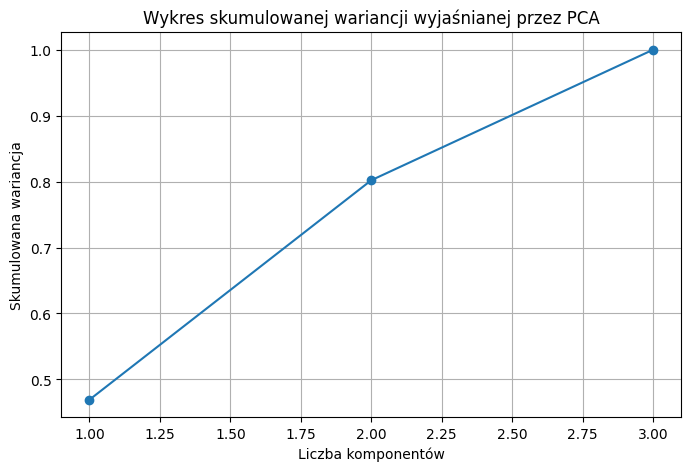

Liczba komponentów PCA tłumaczących ≥90% wariancji: 3

Dane po redukcji PCA – pierwsze 5 wierszy:


,PC1,PC2,PC3
0,-0.066530,-1.366986,0.317309
1,2.321155,-0.529090,-1.383783
2,-0.605746,1.290902,0.132204
3,0.646670,1.522601,-0.182558
4,1.199091,0.284468,-1.025833
5,-0.315766,0.368380,0.405409
6,1.041000,-0.187138,0.454544
7,-0.491492,-0.794430,0.531751
8,0.885318,-0.461751,0.436843
9,-1.738366,0.560918,-0.312035


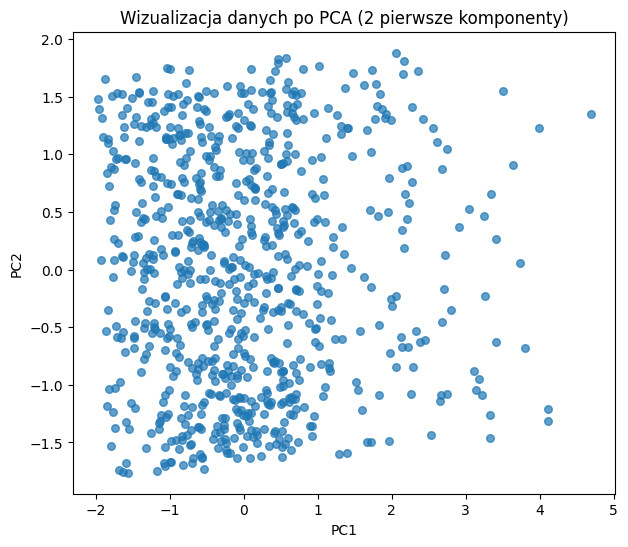

In [4]:
# 4️⃣ Redukcja wymiarowości (PCA)

from sklearn.decomposition import PCA

# Uruchomienie PCA – najpierw bez ograniczenia liczby komponentów
pca_full = PCA()
pca_full.fit(data_scaled)

# Analiza wariancji wyjaśnianej
explained_var = np.cumsum(pca_full.explained_variance_ratio_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_var) + 1), explained_var, marker='o')
plt.title('Wykres skumulowanej wariancji wyjaśnianej przez PCA')
plt.xlabel('Liczba komponentów')
plt.ylabel('Skumulowana wariancja')
plt.grid(True)
plt.show()
#print(pca_full.explained_variance_ratio_)

# Wybór liczby komponentów (np. tłumaczących 90% wariancji)
n_components = np.argmax(explained_var >= 0.9) + 1
print(f"Liczba komponentów PCA tłumaczących ≥90% wariancji: {n_components}")

# Redukcja wymiarów
pca = PCA(n_components=n_components)
data_pca_arr = pca.fit_transform(data_scaled)

# Konwersja do DataFrame + ✅ zachowanie indeksów
data_pca = pd.DataFrame(
    data_pca_arr,
    columns=[f"PC{i+1}" for i in range(n_components)],
    index=data_scaled.index
)

print("\nDane po redukcji PCA – pierwsze 5 wierszy:")
display(data_pca.head(10))

# Wizualizacja w 2D (pierwsze 2 komponenty)
if n_components >= 2:
    plt.figure(figsize=(7, 6))
    plt.scatter(data_pca['PC1'], data_pca['PC2'], s=30, alpha=0.7)
    plt.title('Wizualizacja danych po PCA (2 pierwsze komponenty)')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.show()


5️⃣ Klasteryzacja — K-Means
K-Means to metoda, która dzieli dane na określoną liczbę grup.
Najpierw sprawdzasz, ile klastrów ma sens — testujesz różne liczby i obserwujesz wykres metody Elbow (gdzie krzywa przestaje gwałtownie spadać).
Następnie oceniasz jakość grup za pomocą wskaźnika Silhouette Score, który mówi, jak dobrze punkty pasują do swojej grupy.
Po wybraniu najlepszego modelu opisujesz charakterystykę każdej grupy (np. tanio i szybko, drogo i solidnie, tanio ale niestabilnie itd.).


In [ ]:
# 5️⃣ Klasteryzacja
# — K-Means K-Means to metoda, która dzieli dane na określoną liczbę grup. Najpierw sprawdzasz, ile klastrów ma sens
#  — testujesz różne liczby i obserwujesz wykres metody Elbow (gdzie krzywa przestaje gwałtownie spadać). Następnie oceniasz jakość grup za pomocą wskaźnika Silhouette Score, który mówi, jak dobrze punkty pasują do swojej grupy.
#  Po wybraniu najlepszego modelu opisujesz charakterystykę każdej grupy (np. tanio i szybko, drogo i solidnie, tanio ale niestabilnie itd.).

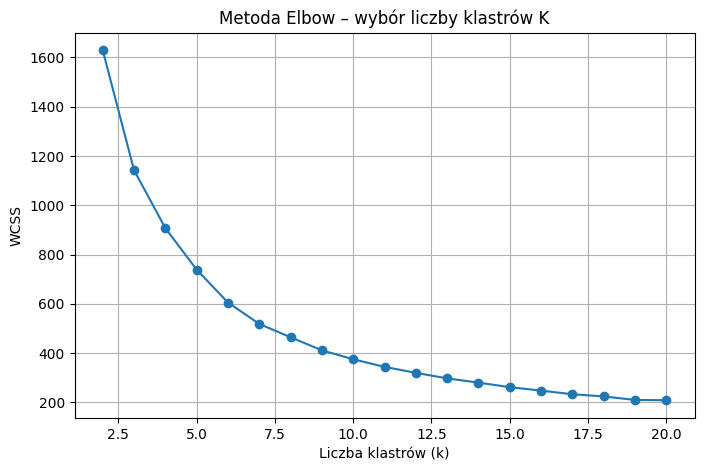

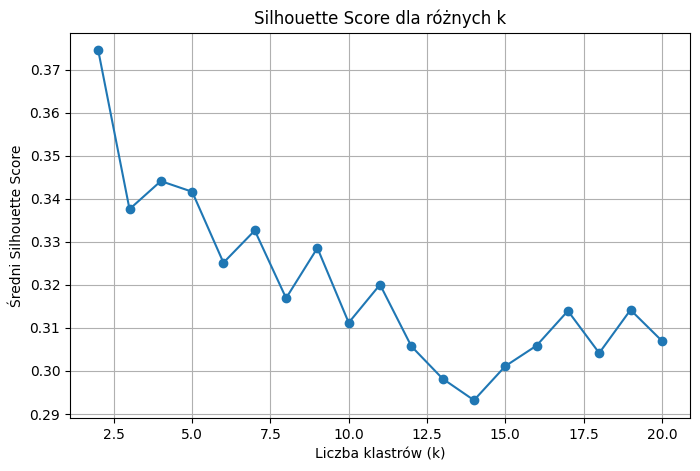

Najlepsza liczba klastrów wg Silhouette Score: 2

Liczba obserwacji w każdym klastrze:
Cluster_KMeans
0    609
1    168
Name: count, dtype: int64


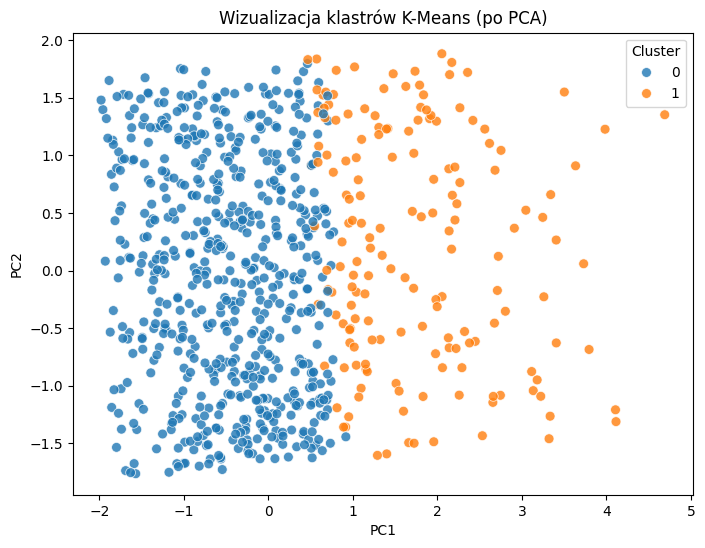

In [5]:
# 5️⃣ Klasteryzacja — K-Means z PCA

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns  # ✅ na wypadek uruchamiania komórki osobno

# ✅ Używamy wyłącznie kolumn PC1, PC2, ... (bez ewentualnych etykiet z poprzednich uruchomień)
X = data_pca.filter(regex='^PC\\d+$').copy()

# Sprawdzenie optymalnej liczby klastrów metodą Elbow
wcss = []  # Within Cluster Sum of Squares
k_range = range(2, 21)#zmienlem z 11 do 21 zwiekszylem mozliwa ilosc klastrow

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(list(k_range), wcss, marker='o')
plt.title('Metoda Elbow – wybór liczby klastrów K')
plt.xlabel('Liczba klastrów (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

# Ocena jakości grup metodą Silhouette
silhouette_scores = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(list(k_range), silhouette_scores, marker='o')
plt.title('Silhouette Score dla różnych k')
plt.xlabel('Liczba klastrów (k)')
plt.ylabel('Średni Silhouette Score')
plt.grid(True)
plt.show()

# Wybór najlepszego K (maksymalny Silhouette)
best_k = list(k_range)[int(np.argmax(silhouette_scores))]
print(f"Najlepsza liczba klastrów wg Silhouette Score: {best_k}")

# Finalny model K-Means
kmeans_final = KMeans(n_clusters=best_k, random_state=42, n_init=10)
data_pca['Cluster_KMeans'] = kmeans_final.fit_predict(X)

# Podgląd rozkładu klastrów
print("\nLiczba obserwacji w każdym klastrze:")
print(data_pca['Cluster_KMeans'].value_counts())

# Wizualizacja klastrów w 2D (po PCA)
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='PC1', y='PC2',
    hue='Cluster_KMeans',
    data=data_pca,
    s=50, alpha=0.8
)
plt.title('Wizualizacja klastrów K-Means (po PCA)')
plt.legend(title='Cluster')
plt.show()


KLASTERYZACJA K-MEANS ORYGINALNE DANE (po redukcji cech i skalowaniu)

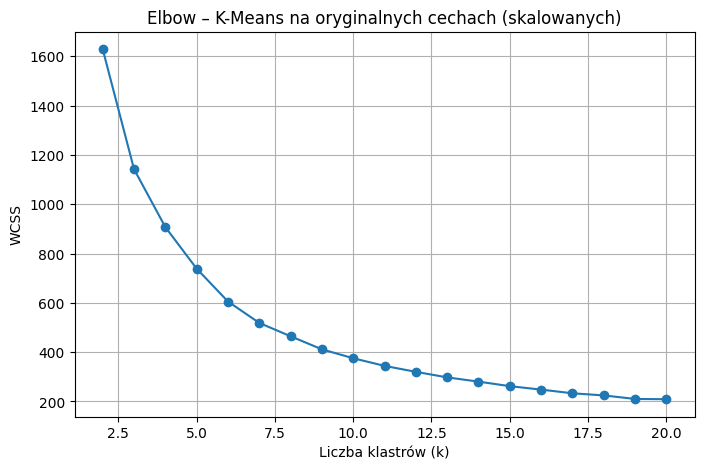

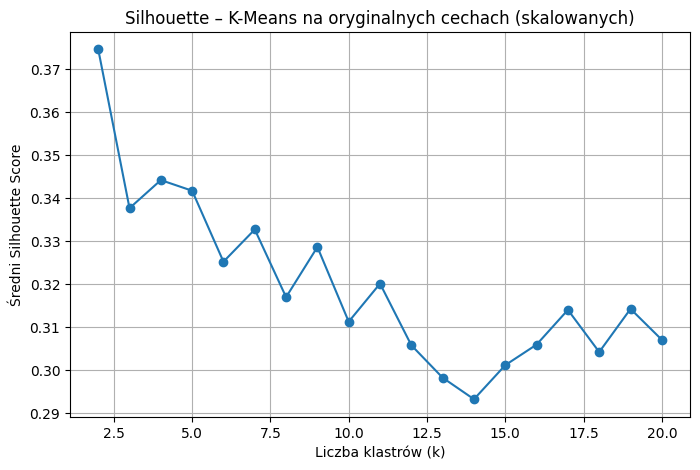

Najlepsze k (bez PCA) wg Silhouette: 2

Liczność klastrów (bez PCA):
Cluster_KMeans_RAW
0    609
1    168
Name: count, dtype: int64


In [6]:
# 6️⃣ Klasteryzacja — K-Means na oryginalnych cechach (bez PCA)

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# ✅ Dane wejściowe: skalowane, oczyszczone cechy (bez silnie skorelowanych)
X_raw = data_scaled.copy()

# Elbow
wcss_raw = []
k_range_raw = range(2, 21)
for k in k_range_raw:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_raw)
    wcss_raw.append(km.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(list(k_range_raw), wcss_raw, marker='o')
plt.title('Elbow – K-Means na oryginalnych cechach (skalowanych)')
plt.xlabel('Liczba klastrów (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

# Silhouette
sil_raw = []
for k in k_range_raw:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_raw)
    sil_raw.append(silhouette_score(X_raw, labels))

plt.figure(figsize=(8, 5))
plt.plot(list(k_range_raw), sil_raw, marker='o')
plt.title('Silhouette – K-Means na oryginalnych cechach (skalowanych)')
plt.xlabel('Liczba klastrów (k)')
plt.ylabel('Średni Silhouette Score')
plt.grid(True)
plt.show()

# Wybór najlepszego k i finalny model
best_k_raw = list(k_range_raw)[int(np.argmax(sil_raw))]
print(f"Najlepsze k (bez PCA) wg Silhouette: {best_k_raw}")

kmeans_raw = KMeans(n_clusters=best_k_raw, random_state=42, n_init=10)
df['Cluster_KMeans_RAW'] = kmeans_raw.fit_predict(X_raw)

print("\nLiczność klastrów (bez PCA):")
print(df['Cluster_KMeans_RAW'].value_counts())


6️⃣ Klasteryzacja — DBSCAN
DBSCAN działa inaczej — nie wymaga podania liczby grup.
Sam wykrywa obszary, gdzie punkty są gęsto skupione, i traktuje je jako klastry, a punkty odległe uznaje za „odstające”.
Ta metoda jest dobra, jeśli dane są nieregularne lub zawierają pojedynczych, nietypowych dostawców.
Porównujesz wyniki DBSCAN z K-Means, by zobaczyć, czy ta metoda lepiej wychwytuje wyjątki lub bardziej naturalne grupy.


In [ ]:
# 6️⃣ Klasteryzacja — DBSCAN DBSCAN działa inaczej
# — nie wymaga podania liczby grup. Sam wykrywa obszary, gdzie punkty są gęsto skupione, i traktuje je jako klastry, a punkty odległe uznaje za „odstające”.
# Ta metoda jest dobra, jeśli dane są nieregularne lub zawierają pojedynczych, nietypowych dostawców. Porównujesz wyniki DBSCAN z K-Means, by zobaczyć, czy ta metoda lepiej wychwytuje wyjątki lub bardziej naturalne grupy.

Najlepsze parametry DBSCAN: eps=1.0, min_samples=3
Silhouette Score: 0.342

Liczba punktów w każdej grupie (DBSCAN):
Cluster_DBSCAN
 0    1983
-1      17
Name: count, dtype: int64


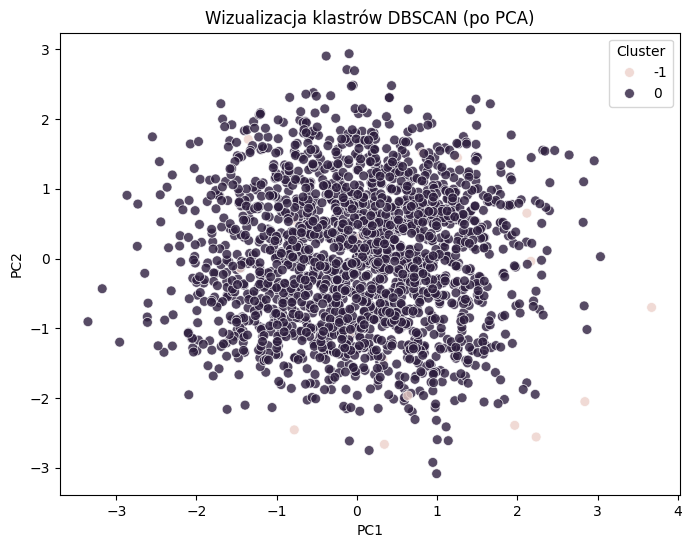

In [ ]:
# 6️⃣ Klasteryzacja — DBSCAN

from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import seaborn as sns  # na wypadek uruchamiania komórki osobno

# ✅ Używamy wyłącznie komponentów PCA (PC1, PC2, ...)
X = data_pca.filter(regex='^PC\\d+$').copy()

# Test kilku wartości parametrów eps i min_samples
eps_values = [0.3, 0.5, 0.7, 1.0]
min_samples_values = [3, 5, 10]

best_dbscan = None
best_silhouette = -1
best_params = None

for eps in eps_values:
    for min_s in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_s)
        labels = db.fit_predict(X)

        # Pomijamy przypadki, gdzie brak sensownych klastrów
        labs = set(labels)
        if len(labs) > 1 and not (labs == {-1}):
            score = silhouette_score(X, labels)
            if score > best_silhouette:
                best_silhouette = score
                best_dbscan = db
                best_params = (eps, min_s)

if best_dbscan:
    print(f"Najlepsze parametry DBSCAN: eps={best_params[0]}, min_samples={best_params[1]}")
    print(f"Silhouette Score: {best_silhouette:.3f}")
    data_pca['Cluster_DBSCAN'] = best_dbscan.fit_predict(X)
else:
    print("Nie udało się znaleźć sensownych klastrów DBSCAN (zbyt rozproszone dane).")

# Sprawdzenie liczby grup
if 'Cluster_DBSCAN' in data_pca.columns:
    print("\nLiczba punktów w każdej grupie (DBSCAN):")
    print(data_pca['Cluster_DBSCAN'].value_counts())

    # Wizualizacja klastrów DBSCAN
    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        x='PC1', y='PC2',
        hue='Cluster_DBSCAN',
        data=data_pca,
        s=50, alpha=0.8
    )
    plt.title('Wizualizacja klastrów DBSCAN (po PCA)')
    plt.legend(title='Cluster')
    plt.show()


7️⃣ Ocena i wizualizacja wyników
Na tym etapie porównujesz oba podejścia (K-Means i DBSCAN).
Tworzysz wizualizacje po PCA, żeby zobaczyć klastry w układzie 2D lub 3D.
Analizujesz, jak średnie wartości cech różnią się między grupami — które grupy mają najniższy koszt, które najwięcej reklamacji itp.
Interpretujesz wyniki w kontekście biznesowym: co oznaczają poszczególne grupy i jak mogą pomóc w zarządzaniu dostawcami.


In [ ]:
# 7️⃣ Ocena i wizualizacja wyników Na tym etapie porównujesz oba podejścia (K-Means i DBSCAN).
# Tworzysz wizualizacje po PCA, żeby zobaczyć klastry w układzie 2D lub 3D. Analizujesz, jak średnie wartości cech różnią się między grupami
# — które grupy mają najniższy koszt, które najwięcej reklamacji itp. Interpretujesz wyniki w kontekście biznesowym: co oznaczają poszczególne grupy i jak mogą pomóc w zarządzaniu dostawcami.

[INFO] Brak zapisanych metryk dla K-Means (best_k / best_kmeans_sil).
[INFO] DBSCAN: clusters=2 | silhouette=0.342


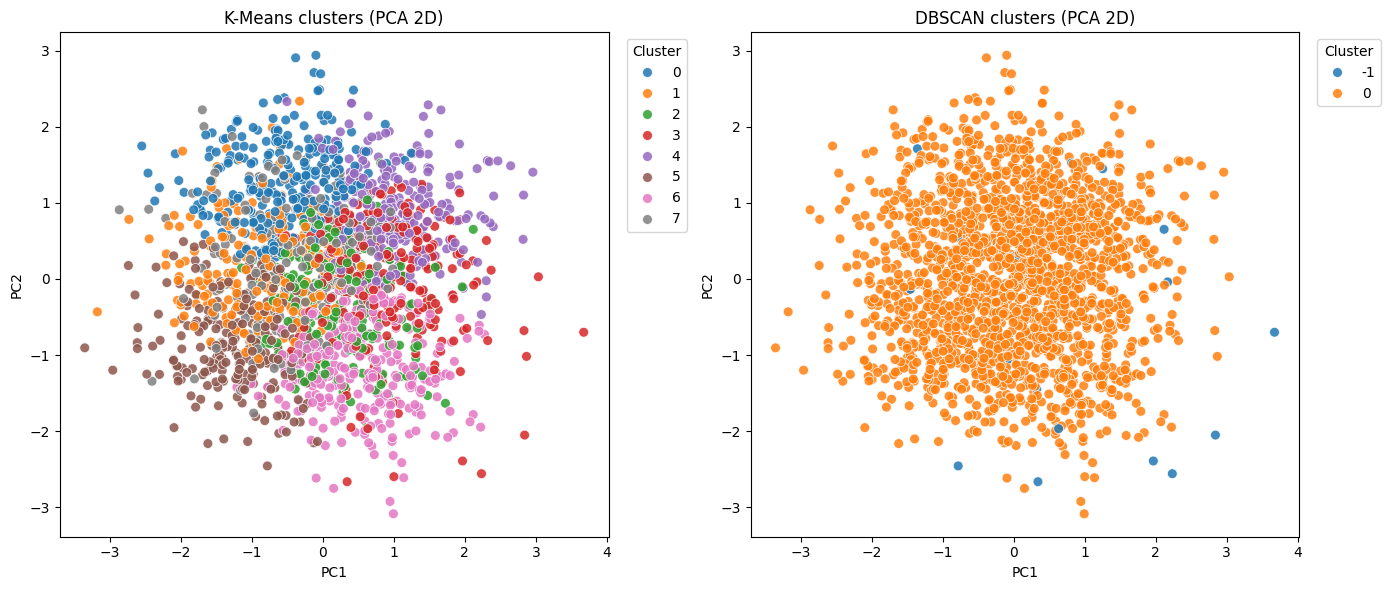


[INFO] K-Means — liczność klastrów:
Cluster_KMeans
0    256
1    210
2    208
3    251
4    253
5    245
6    313
7    264
Name: count, dtype: int64

[INFO] K-Means — profil (średnie z-score cech):


,delivery_time,reliability,cost,complaints
Cluster_KMeans,,,,
0,0.04,1.04,0.50,1.03
1,0.24,0.27,1.30,-0.69
2,0.93,0.90,-0.55,-0.67
3,-0.09,-0.01,-1.40,0.73
4,0.98,-0.82,0.24,0.81
5,-0.97,0.89,-0.07,-0.84
6,0.11,-0.98,-0.35,-1.00
7,-1.05,-0.78,0.49,0.57



[INFO] DBSCAN — liczność klastrów (uwzględnia szum -1):
Cluster_DBSCAN
-1      17
 0    1983
Name: count, dtype: int64

[INFO] DBSCAN — profil (średnie z-score cech, bez szumu -1):


,delivery_time,reliability,cost,complaints
Cluster_DBSCAN,,,,
0,-0.0,0.0,0.01,0.0


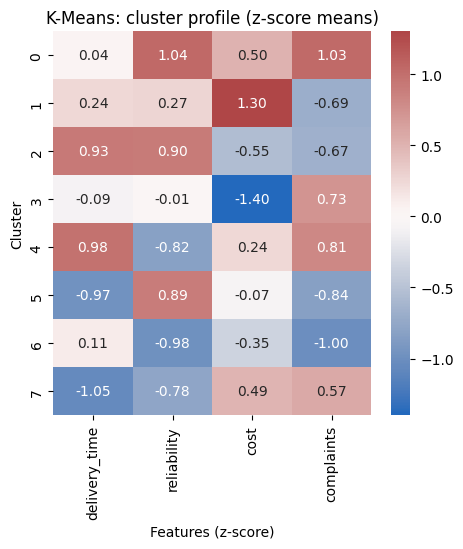

/tmp/ipython-input-3728297119.py:106: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


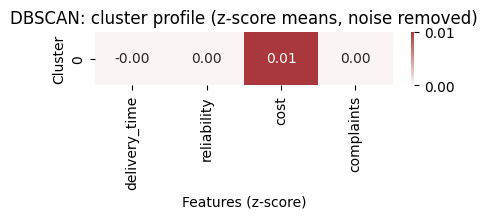


[INFO] Propozycje podpisów K-Means (na podstawie z-score):
  • Cluster 0: reliability(+), complaints(+)
  • Cluster 1: cost(+), complaints(-)
  • Cluster 2: delivery_time(+), reliability(+)
  • Cluster 3: cost(-), complaints(+)
  • Cluster 4: delivery_time(+), reliability(-)
  • Cluster 5: delivery_time(-), reliability(+)
  • Cluster 6: complaints(-), reliability(-)
  • Cluster 7: delivery_time(-), reliability(-)

[INFO] Propozycje podpisów DBSCAN (bez -1):
  • Cluster 0: cost(+), delivery_time(-)

[INFO] K-Means: klaster o najlepszym (najniższym) średnim LEAD TIME to: 7


,supplier_id,delivery_time,reliability,cost,complaints,PC1,PC2,Cluster_KMeans,Cluster_DBSCAN
2,S3,3.492346,0.783049,111.438056,4,-0.226952,1.053471,7,0
8,S9,3.162657,0.860482,102.508353,3,-0.681815,0.324457,7,0
9,S10,4.381980,0.710491,108.209522,3,0.507996,0.381036,7,0
13,S14,4.156033,0.852061,104.210911,2,-0.489861,-0.032794,7,0
15,S16,3.929582,0.829517,103.604474,3,-0.239621,0.433677,7,0
17,S18,3.191108,0.703466,100.932179,3,0.370283,-0.081695,7,0
19,S20,4.482235,0.779127,122.617834,4,-0.238704,1.567281,7,0
22,S23,4.596271,0.714469,119.773779,3,0.141232,0.774152,7,0
29,S30,3.738496,0.836060,145.100560,4,-1.696067,2.220856,7,0
41,S42,3.338357,0.826686,101.883620,4,-0.209284,0.842235,7,0


In [ ]:
# 7️⃣ Ocena i wizualizacja wyników

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score

# ✅ używamy wyłącznie komponentów PCA (PC1, PC2, ...)
X = data_pca.filter(regex='^PC\\d+$')

# --- 7.0 Zbiór pomocniczy: standaryzowane cechy jako DataFrame (jeśli jeszcze go nie masz)
# Załóżmy, że masz: X_scaled (np.array) i num_cols (lista cech numerycznych)
# df_scaled = pd.DataFrame(X_scaled, columns=num_cols, index=df_clean.index)
df_scaled = data_scaled.copy()  # ✅ używamy gotowego data_scaled z kroku 3

# --- 7.1 Porównanie jakości: Silhouette (K-Means vs DBSCAN) – jeśli masz zapisane wartości, pokażmy je
try:
    print(f"[INFO] K-Means: k={best_k} | silhouette={best_kmeans_sil:.3f}")
except:
    print("[INFO] Brak zapisanych metryk dla K-Means (best_k / best_kmeans_sil).")

if 'Cluster_DBSCAN' in data_pca.columns:
    labels_db = data_pca['Cluster_DBSCAN'].values
    # Silhouette liczymy tylko gdy jest co najmniej 2 klastry i nie wszystkie to szum (-1)
    if len(set(labels_db)) > 1 and not (set(labels_db) == {-1}):
        sil_db = silhouette_score(X, labels_db)  # ✅ zamiast data_pca[['PC1','PC2']]
        print(f"[INFO] DBSCAN: clusters={len(set(labels_db))} | silhouette={sil_db:.3f}")
    else:
        print("[INFO] DBSCAN: brak sensownych klastrów do obliczenia silhouette.")
else:
    print("[INFO] Brak kolumny 'Cluster_DBSCAN' w data_pca.")

# --- 7.2 Wizualizacje 2D po PCA dla obu metod
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.scatterplot(
    data=data_pca, x='PC1', y='PC2', hue='Cluster_KMeans',
    palette='tab10', s=50, ax=axes[0], alpha=0.85
)
axes[0].set_title('K-Means clusters (PCA 2D)')
axes[0].legend(title='Cluster', bbox_to_anchor=(1.02, 1), loc='upper left')

if 'Cluster_DBSCAN' in data_pca.columns:
    sns.scatterplot(
        data=data_pca, x='PC1', y='PC2', hue='Cluster_DBSCAN',
        palette='tab10', s=50, ax=axes[1], alpha=0.85
    )
    axes[1].set_title('DBSCAN clusters (PCA 2D)')
    axes[1].legend(title='Cluster', bbox_to_anchor=(1.02, 1), loc='upper left')
else:
    axes[1].axis('off')
    axes[1].set_title('DBSCAN: no labels')

plt.tight_layout()
plt.show()

# --- 7.3 Charakterystyka klastrów: średnie cech (w skali standaryzowanej)
def cluster_profile_table(labels_col_name):
    """
    Buduje tabelę średnich cech (z-score) per klaster oraz liczności.
    labels_col_name: 'Cluster_KMeans' lub 'Cluster_DBSCAN'
    """
    if labels_col_name not in data_pca.columns:
        return None

    labels = data_pca[labels_col_name]
    tmp = df_scaled.copy()
    tmp[labels_col_name] = labels.values  # dopasowanie indeksu

    # Usuwamy szum DBSCAN (-1) z profilu, ale pokazujemy liczność
    if labels_col_name == 'Cluster_DBSCAN':
        counts = tmp[labels_col_name].value_counts().sort_index()
        prof = tmp[tmp[labels_col_name] != -1].groupby(labels_col_name)[df_scaled.columns].mean().round(2)  # ✅
    else:
        counts = tmp[labels_col_name].value_counts().sort_index()
        prof = tmp.groupby(labels_col_name)[df_scaled.columns].mean().round(2)  # ✅

    return prof, counts

# K-Means profile
km_prof, km_counts = cluster_profile_table('Cluster_KMeans')
print("\n[INFO] K-Means — liczność klastrów:")
print(km_counts)
print("\n[INFO] K-Means — profil (średnie z-score cech):")
display(km_prof)

# DBSCAN profile (jeśli są etykiety)
if 'Cluster_DBSCAN' in data_pca.columns:
    db_prof, db_counts = cluster_profile_table('Cluster_DBSCAN')
    print("\n[INFO] DBSCAN — liczność klastrów (uwzględnia szum -1):")
    print(db_counts)
    if db_prof is not None and not db_prof.empty:
        print("\n[INFO] DBSCAN — profil (średnie z-score cech, bez szumu -1):")
        display(db_prof)

# --- 7.4 Heatmapy profili cech per klaster (ułatwia „czytanie” grup)
def plot_cluster_heatmap(profile_df, title):
    if profile_df is None or profile_df.empty:
        print(f"[WARN] {title}: brak danych do heatmapy.")
        return
    plt.figure(figsize=(min(12, 1.2*len(profile_df.columns)), 0.7*len(profile_df)))
    sns.heatmap(profile_df, cmap='vlag', center=0, annot=True, fmt='.2f')
    plt.title(title)
    plt.xlabel('Features (z-score)')
    plt.ylabel('Cluster')
    plt.tight_layout()
    plt.show()

plot_cluster_heatmap(km_prof, 'K-Means: cluster profile (z-score means)')
if 'Cluster_DBSCAN' in data_pca.columns and db_prof is not None and not db_prof.empty:
    plot_cluster_heatmap(db_prof, 'DBSCAN: cluster profile (z-score means, noise removed)')

# --- 7.5 Krótka, automatyczna etykietyzacja klastrów (przykład)
# Heurystyka: wskaż cechy o najwyższym bezwzględnym z-score w danym klastrze
def auto_labels_from_profile(profile_df, top_n=2):
    if profile_df is None or profile_df.empty:
        return {}
    labels = {}
    for c in profile_df.index:
        top_feats = profile_df.loc[c].abs().sort_values(ascending=False).head(top_n).index.tolist()
        sign = ['+' if profile_df.loc[c, f] > 0 else '-' for f in top_feats]
        pretty = ', '.join([f"{f}({s})" for f, s in zip(top_feats, sign)])
        labels[c] = pretty
    return labels

km_labels = auto_labels_from_profile(km_prof, top_n=2)
print("\n[INFO] Propozycje podpisów K-Means (na podstawie z-score):")
for c, lab in km_labels.items():
    print(f"  • Cluster {c}: {lab}")

if 'Cluster_DBSCAN' in data_pca.columns and db_prof is not None and not db_prof.empty:
    db_labels = auto_labels_from_profile(db_prof, top_n=2)
    print("\n[INFO] Propozycje podpisów DBSCAN (bez -1):")
    for c, lab in db_labels.items():
        print(f"  • Cluster {c}: {lab}")

# --- 7.6 (Opcja) Rzutowanie wyników z powrotem do oryginalnego df, by łatwo filtrować dostawców
df_results = df.copy()  # ✅ używamy oryginalnego df
df_results[['PC1','PC2']] = data_pca[['PC1','PC2']]
df_results['Cluster_KMeans'] = data_pca['Cluster_KMeans'].values
if 'Cluster_DBSCAN' in data_pca.columns:
    df_results['Cluster_DBSCAN'] = data_pca['Cluster_DBSCAN'].values

# Przykładowe „fiszki” biznesowe: top 10 dostawców z klastra o najniższym średnim lead time (K-Means)
if km_prof is not None:
    try:
        lead_col_guess = [c for c in num_cols if 'lead' in c.lower() or 'delivery_time' in c.lower() or 'on_time' in c.lower()]
        if lead_col_guess:
            # zakładamy, że mniejsza wartość = lepiej (krótszy lead time)
            best_cluster = km_prof[lead_col_guess].mean(axis=1).sort_values().index[0]
            print(f"\n[INFO] K-Means: klaster o najlepszym (najniższym) średnim LEAD TIME to: {best_cluster}")
            sample = df_results[df_results['Cluster_KMeans'] == best_cluster].head(10)
            display(sample)
    except Exception as e:
        print(f"[WARN] Nie udało się wygenerować 'fiszek' biznesowych: {e}")


8️⃣ Wnioski i interpretacja biznesowa
Na końcu opisujesz, co udało się odkryć:
•	jakie grupy dostawców istnieją,
•	które są strategiczne, a które ryzykowne,
•	jak firma mogłaby wykorzystać te informacje (np. renegocjacje kontraktów, zmiana priorytetów dostaw, lepsze planowanie zapasów).
Celem jest pokazanie, że analiza ma realne zastosowanie, a nie tylko techniczny wynik
